# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [4]:
cities[1:10]

['nago',
 'magadan',
 'narasannapeta',
 'tiksi',
 'kodiak',
 'puerto natales',
 'kristiansund',
 'kaoma',
 'olonkinbyen']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | nago
Processing Record 3 of Set 1 | magadan
Processing Record 4 of Set 1 | narasannapeta
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | kristiansund
Processing Record 9 of Set 1 | kaoma
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | le port
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | eyl
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | bazarak
Processing Record 22 of Set 1 | ulladulla
Processing Record 2

In [8]:
city_data[1:2]

[{'City': 'nago',
  'Lat': 26.5881,
  'Lng': 127.9761,
  'Max Temp': 302.39,
  'Humidity': 87,
  'Cloudiness': 2,
  'Wind Speed': 1.86,
  'Country': 'JP',
  'Date': 1722709586}]

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,268.96,95,100,4.88,GS,1722709585
1,nago,26.5881,127.9761,302.39,87,2,1.86,JP,1722709586
2,magadan,59.5667,150.8000,283.48,60,0,1.88,RU,1722709587
3,narasannapeta,18.4167,84.0500,300.78,86,100,2.03,IN,1722709588
4,tiksi,71.6872,128.8694,279.38,81,98,0.69,RU,1722709589


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,268.96,95,100,4.88,GS,1722709585
1,nago,26.5881,127.9761,302.39,87,2,1.86,JP,1722709586
2,magadan,59.5667,150.8000,283.48,60,0,1.88,RU,1722709587
3,narasannapeta,18.4167,84.0500,300.78,86,100,2.03,IN,1722709588
4,tiksi,71.6872,128.8694,279.38,81,98,0.69,RU,1722709589


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

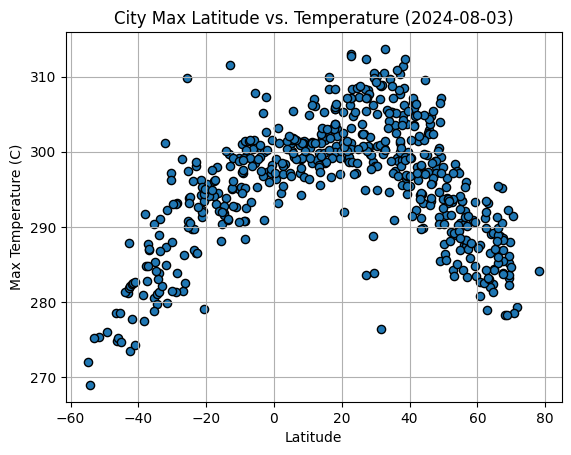

In [36]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y="Max Temp", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
date = city_data_df["Date"].apply(lambda x: time.strftime("%Y-%m-%d", time.localtime(x))).to_list()[0]
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

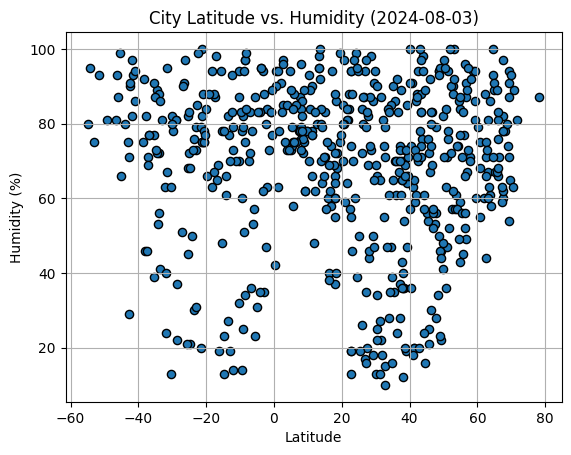

In [34]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y="Humidity", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

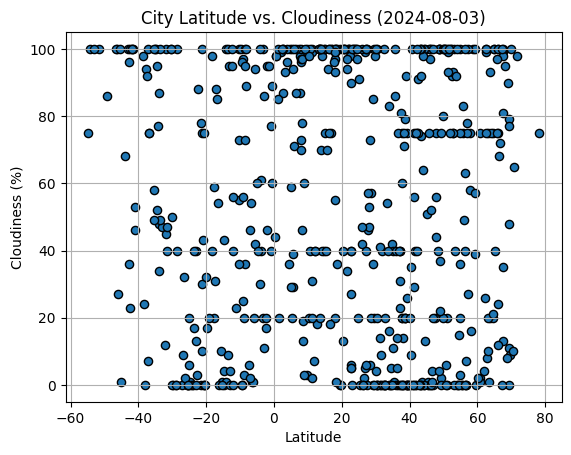

In [35]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y="Cloudiness", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

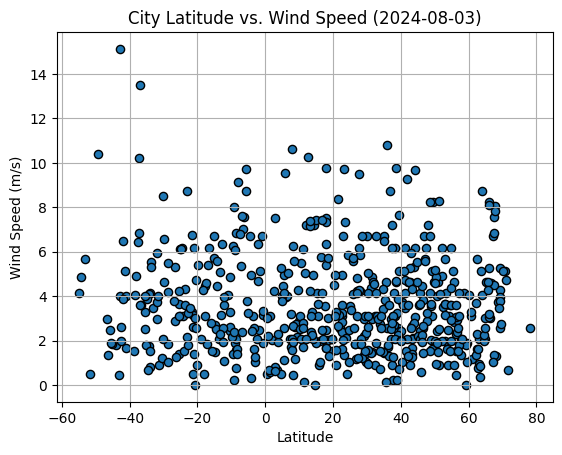

In [37]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y="Wind Speed", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def plot_scatter(x, y, xlabel="x", ylabel="y"):
    (slope, intercept, rvalue, _, _) = linregress(x, y)
    regress_values = x * slope + intercept
    print(f"The r^2 value is {rvalue}")
    plt.scatter(x, y)
    plt.plot(x, regress_values, color="red")
    equation_text = f'y = {slope:.2f}x + {intercept:.1f}'
    plt.text(x=x.min(), y=y.max(), s=equation_text, fontsize=10, color='red', verticalalignment='top')
    plt.title(f"{xlabel} vs {ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)




In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nago,26.5881,127.9761,302.39,87,2,1.86,JP,1722709586
2,magadan,59.5667,150.8000,283.48,60,0,1.88,RU,1722709587
3,narasannapeta,18.4167,84.0500,300.78,86,100,2.03,IN,1722709588
4,tiksi,71.6872,128.8694,279.38,81,98,0.69,RU,1722709589
5,kodiak,57.7900,-152.4072,285.88,71,75,2.06,US,1722709590


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,268.96,95,100,4.88,GS,1722709585
6,puerto natales,-51.7236,-72.4875,275.40,93,100,0.51,CL,1722709591
8,kaoma,-14.7833,24.8000,291.89,23,4,2.69,ZM,1722709594
10,blackmans bay,-43.0167,147.3167,281.22,75,100,0.45,AU,1722709644
12,ushuaia,-54.8000,-68.3000,271.96,80,75,4.12,AR,1722709437


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is -0.6167784243397072


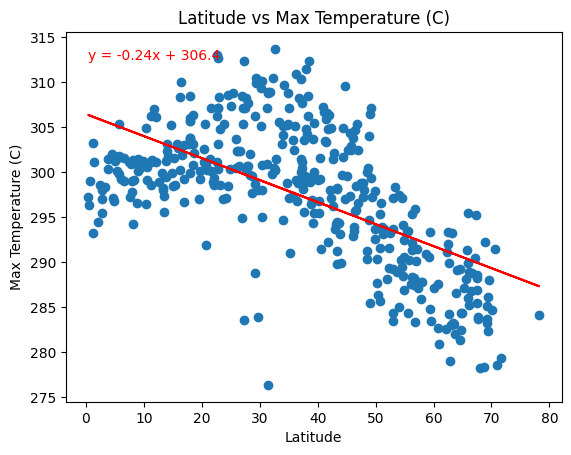

In [59]:
# Linear regression on Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temperature (C)")

The r^2 value is 0.8130730135601408


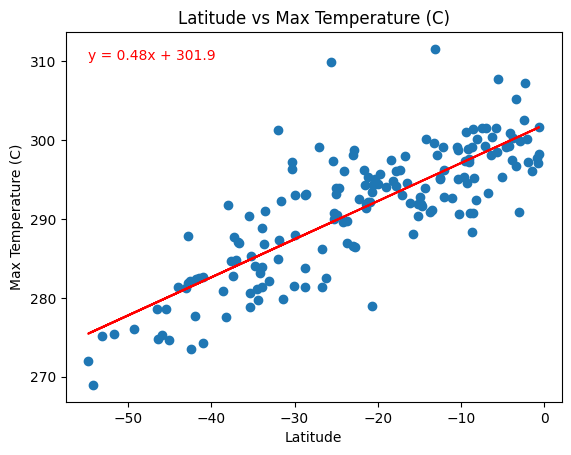

In [58]:
# Linear regression on Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is -0.034479741838052504


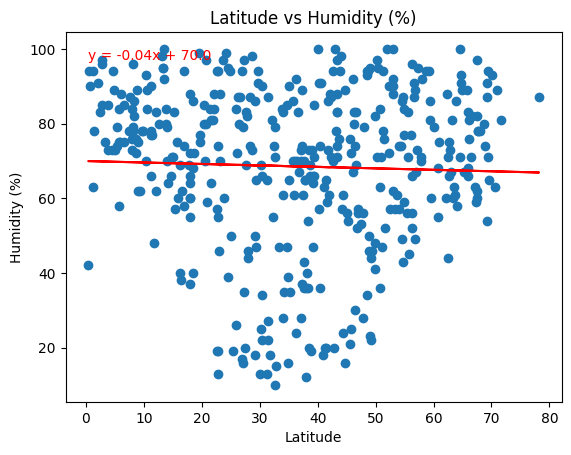

In [60]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity (%)")

The r^2 value is -0.12461512149225062


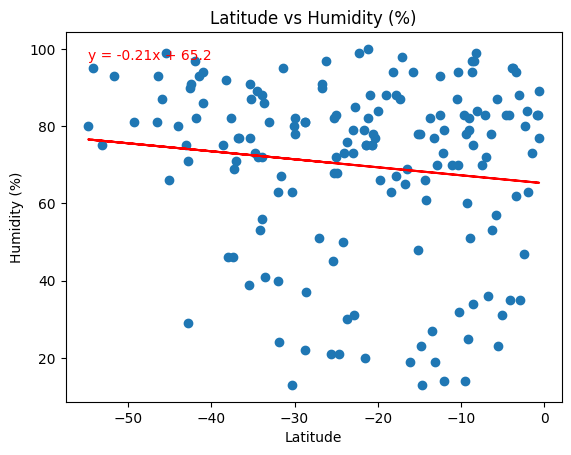

In [61]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is -0.14642916215515708


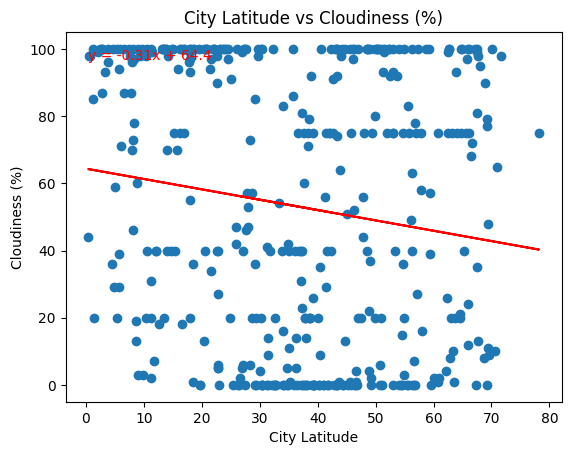

In [62]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Cloudiness"], xlabel="City Latitude", ylabel="Cloudiness (%)")

The r^2 value is -0.18560683704703784


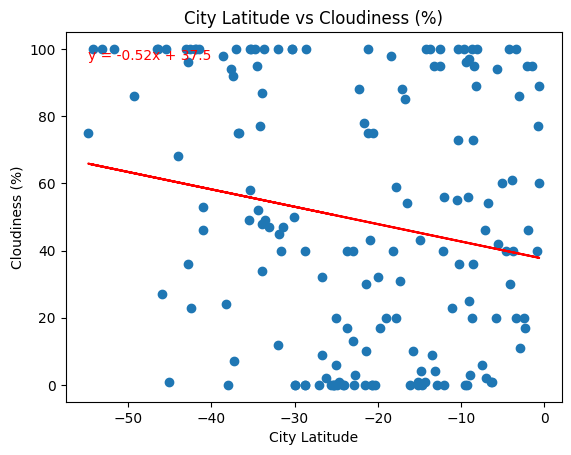

In [63]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Cloudiness"], xlabel="City Latitude", ylabel="Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.016542324184699527


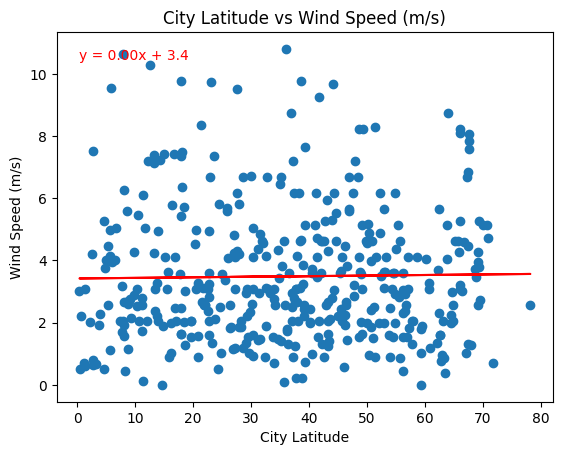

In [64]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Wind Speed"], xlabel="City Latitude", ylabel="Wind Speed (m/s)")

The r^2 value is -0.03706481549577091


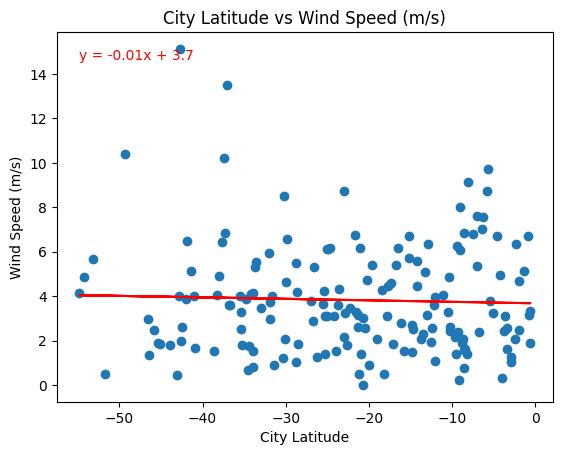

In [65]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Wind Speed"], xlabel="City Latitude", ylabel="Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE